# Problem statement:
    Predict the house prices from given data set

# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the data set

In [2]:
df = pd.read_csv('house_price.csv')

# Studying the data set

In [3]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [5]:
df.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


# cleaning the data set

In [ ]:
#checking for null values

In [6]:
df.isna().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [ ]:
#no null values available

# Exploratory Data Analysis

In [ ]:
#viewing unique values of each column

In [7]:
for column in df.columns[:]:
    print(column,": ",df[column].unique())

Location :  ['Bommanahalli' 'Whitefield']
BHK :  [3 2]
Furnishing :  [1 0]
Sq.ft :  [3000 1650 1000 1600 1200 1760 1870 2200 2100 1704 1326 1088 1744 1060
  950 3155 1280 1033 1135 1471 2292 1290 1089 1250 1300 2180 1568 1768
 1245 1251 1400 1500 1381  960 1675 2117 1333 1460  767 1050 1375]
Old(years) :  [ 1 10  5]
Floor :  [ 3  0  9  1  8 10  7 13  2 12 11  4]
Price :  [28000 18000 16400 27000 20000 39500 35000 42000 21000 14000 22000 16000
 45000 23000 16500 39000 26000 15500 17000 24000 30000 25000 19000 19500
 11000 33000]


In [ ]:
#finding the correlation using heat map

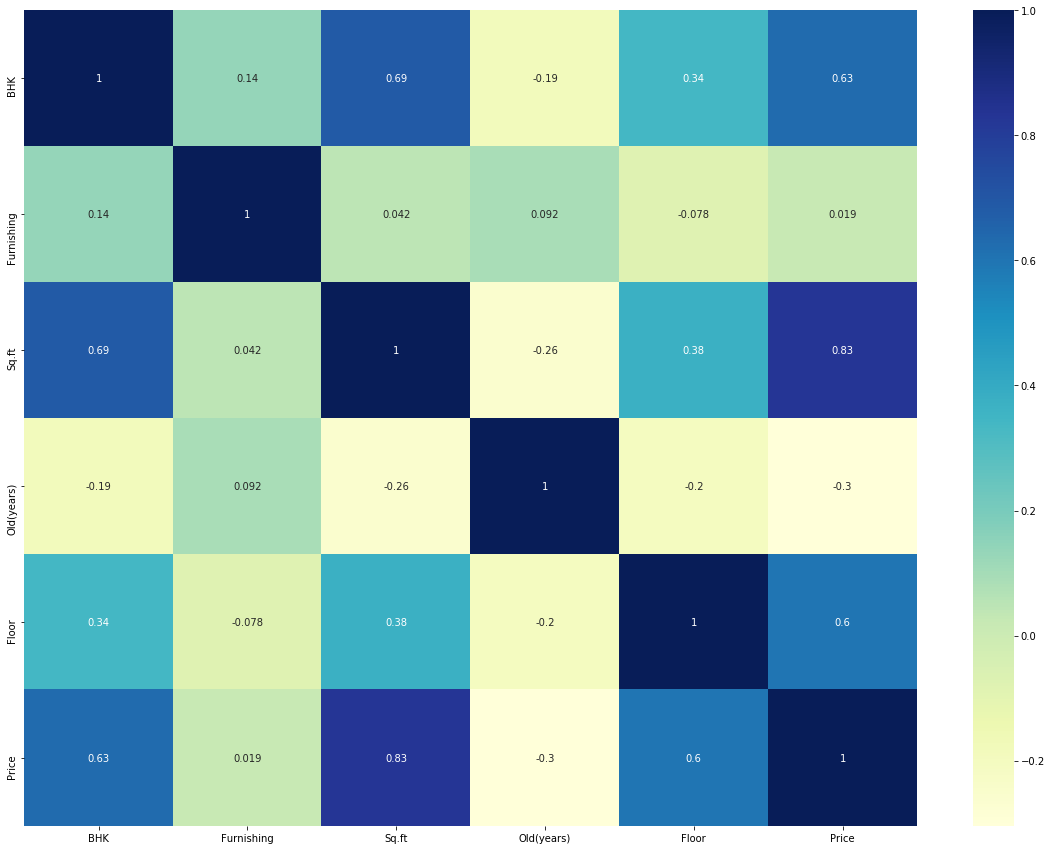

In [9]:
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [10]:
cor= corr['Price']
cor

BHK           0.633094
Furnishing    0.018996
Sq.ft         0.831104
Old(years)   -0.304325
Floor         0.599192
Price         1.000000
Name: Price, dtype: float64

In [ ]:
#this is a Regression problem

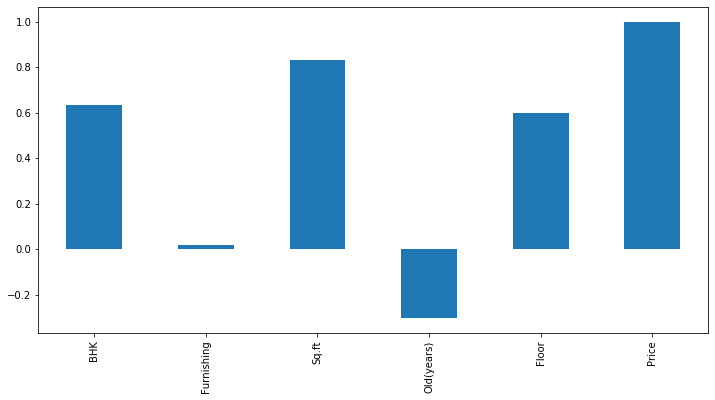

In [11]:
plt.figure(figsize=(12,6))
cor.plot(kind="bar")
plt.show()

#from the heat map we can see that price and old(years) are negatively correlated . So as the house is old the price may drop.
Also sqft,bhk and floor has strong positive correlation with price

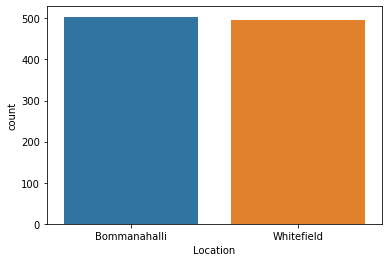

In [13]:
sns.countplot(df['Location'], label='Count')
plt.show()

In [ ]:
#Encoding categorical variable

In [19]:
# Data transform
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [20]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


In [21]:
# Seperate dependent and independend variable
x = df.drop(['Price'],axis=1)
y = df['Price']
print(x.shape)
print(y.shape)

(1000, 6)
(1000,)


In [23]:
# Split data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [ ]:
#applying standard scalar

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)

array([[ 1.040833  ,  1.16486152, -0.72919727,  1.30765612, -1.01220563,
         1.19561527],
       [-0.96076892, -0.85847114,  1.37137101, -0.70858011,  0.27313485,
        -0.4052468 ],
       [ 1.040833  , -0.85847114,  1.37137101, -0.39746948,  0.27313485,
        -0.72541921],
       ...,
       [ 1.040833  , -0.85847114, -0.72919727, -0.88607272,  0.27313485,
        -0.08507438],
       [-0.96076892,  1.16486152, -0.72919727, -0.38749798, -1.01220563,
        -0.72541921],
       [-0.96076892, -0.85847114,  1.37137101, -0.48721293,  0.27313485,
         0.23509803]])

# Applying Machine Learning algorithms

In [26]:
#applying Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8411110831099131

In [ ]:
#Finding cross validation score

In [28]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr_clf,X_train,Y_train,cv=5)
score

array([0.79508996, 0.8739127 , 0.84555101, 0.82138965, 0.81679305])

In [38]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(random_state=0)
dec_reg.fit(X_train,Y_train)

dec_reg.predict(X_train)
dec_reg.predict(X_test)
score_dec=dec_reg.score(X_train,Y_train)
print(dec_reg.score(X_test,Y_test))
score_dec

1.0


1.0

In [ ]:
#Decision tree regressor algorithm is giving 100 percent accuracy

In [42]:
x1=pd.DataFrame(dec_reg.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(X_train.columns,columns=["Names"])
score_dec=pd.concat([x2,x1],axis=1)
score_dec.sort_values("Scores",ascending=False).head()

,Names,Scores
3,Sq.ft,0.869055
5,Floor,0.075741
0,Location,0.033865
4,Old(years),0.010919
2,Furnishing,0.010420


In [ ]:
#conclusion:
from the given data set it is understood that as the house is old the price may drop.
The best drive feauture for price are Sq.ft,Floor,Location,Old(years),Furnishing
Also sqft and floor has strong positive correlation with price
AS the squre feet increses the price also increases.